In [1]:
import numpy as np
import numpy.random as nr
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv("CreditCardData.csv")

In [4]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df[df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [8]:
df = df[df["CREDIT_LIMIT"].notnull()]

In [9]:
df[df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [10]:
df.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
df = df.set_index('CUST_ID')

In [14]:
df = df[df['CASH_ADVANCE_FREQUENCY'] <= 1]

In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000
mean,1561.845414,0.877259,1004.083438,592.902497,411.481425,976.518276,0.490713,0.202530,0.364804,0.134194,3.235209,14.722962,4492.308258,1733.677679,833.926993,0.153869,11.521306
std,2079.718985,0.236879,2137.526323,1660.653167,904.699100,2095.839076,0.401385,0.298444,0.397479,0.197669,6.809507,24.866639,3638.446283,2896.003290,2337.090542,0.292606,1.331900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.175207,0.888889,39.830000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.273938,163.023401,0.000000,12.000000
50%,871.499977,1.000000,362.480000,38.000000,89.580000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.533676,289.474616,0.000000,12.000000
75%,2046.727519,1.000000,1111.120000,578.660000,469.140000,1112.247446,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1903.279643,787.853297,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
df['TOTAL_PURCHASES'] = df['PURCHASES'] + df['ONEOFF_PURCHASES'] + df['INSTALLMENTS_PURCHASES']
df['TOTAL_PURCHASE_FREQUENCY'] = (df['PURCHASES_FREQUENCY'] + df['ONEOFF_PURCHASES_FREQUENCY'] + df['PURCHASES_INSTALLMENTS_FREQUENCY']) / 3

In [17]:
del df['PURCHASES']
del df['ONEOFF_PURCHASES']
del df['INSTALLMENTS_PURCHASES']
del df['PURCHASES_FREQUENCY']
del df['ONEOFF_PURCHASES_FREQUENCY']
del df['PURCHASES_INSTALLMENTS_FREQUENCY']

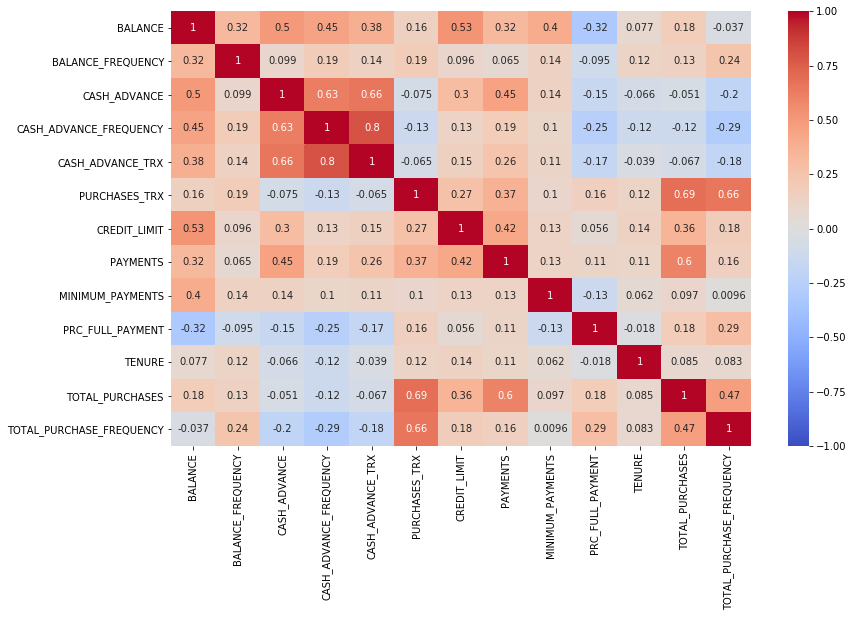

In [18]:
# Check the correlation between all variables
# There are some highly correlated variables
plt.figure(figsize=(13, 8))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [19]:
del df['BALANCE']
del df['BALANCE_FREQUENCY']
del df['CASH_ADVANCE_FREQUENCY']
del df['TOTAL_PURCHASE_FREQUENCY']
del df['PAYMENTS']
del df['TENURE']
del df['MINIMUM_PAYMENTS']

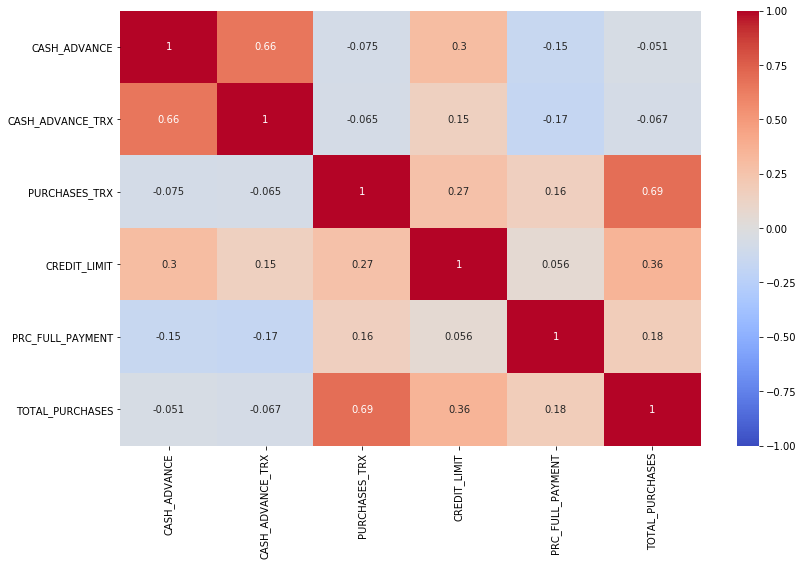

In [20]:
# Check the correlation between all variables
# There are some highly correlated variables
plt.figure(figsize=(13, 8))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [21]:
from sklearn.preprocessing import StandardScaler, normalize

In [22]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_norm = normalize(df_std) 
df_norm = pd.DataFrame(df_norm)

In [23]:
from sklearn.cluster import KMeans

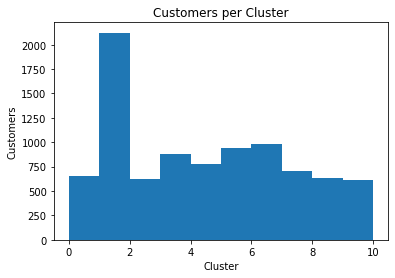

In [24]:
clustering = KMeans(n_clusters=10, random_state=42)

cluster_labels = clustering.fit_predict(df_norm)

plt.hist(cluster_labels, bins=range(11))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

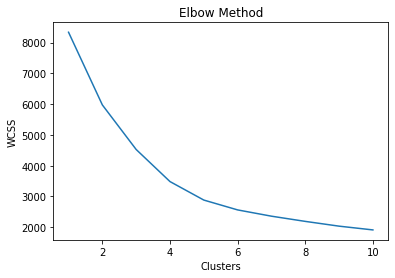

In [25]:
wcss = []

cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [27]:
kmeans_values=[]

for cluster in range(2,15):
    kmeans = KMeans(n_clusters=cluster, random_state=42).fit_predict(df_norm)
    sil_score = metrics.silhouette_score(df_norm, kmeans, metric='euclidean')
    print(f"Silhouette score for {cluster} k-means clusters: {sil_score:.3f}")
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 k-means clusters: 0.296
Silhouette score for 3 k-means clusters: 0.339
Silhouette score for 4 k-means clusters: 0.380
Silhouette score for 5 k-means clusters: 0.393
Silhouette score for 6 k-means clusters: 0.352
Silhouette score for 7 k-means clusters: 0.342
Silhouette score for 8 k-means clusters: 0.321
Silhouette score for 9 k-means clusters: 0.307
Silhouette score for 10 k-means clusters: 0.297
Silhouette score for 11 k-means clusters: 0.298
Silhouette score for 12 k-means clusters: 0.277
Silhouette score for 13 k-means clusters: 0.289
Silhouette score for 14 k-means clusters: 0.258


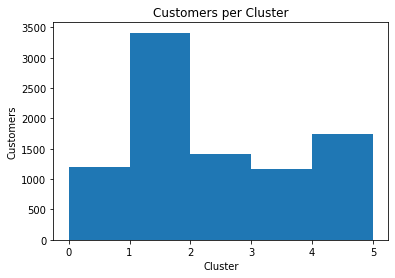

In [28]:
clustering = KMeans(n_clusters=5, random_state=42)

cluster_labels = clustering.fit_predict(df_norm)

plt.hist(cluster_labels, bins=range(6))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

In [29]:
df_k = df.copy()
df_k['Kmeans_cluster'] = cluster_labels

In [30]:
df_k = df_k.reindex(columns=['CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'TOTAL_PURCHASES', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'Kmeans_cluster'])

In [31]:
df_k

,CASH_ADVANCE,CASH_ADVANCE_TRX,TOTAL_PURCHASES,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,Kmeans_cluster
CUST_ID,,,,,,,
C10001,0.000000,0,190.80,2,1000.0,0.000000,1
C10002,6442.945483,4,0.00,0,7000.0,0.222222,4
C10003,0.000000,0,1546.34,12,7500.0,0.000000,3
C10004,205.788017,1,2998.00,1,7500.0,0.000000,3
C10005,0.000000,0,32.00,1,1200.0,0.000000,1
...,...,...,...,...,...,...,...
C19186,0.000000,0,582.24,6,1000.0,0.500000,2
C19187,0.000000,0,600.00,6,1000.0,0.000000,1
C19188,0.000000,0,288.80,5,1000.0,0.250000,1


In [32]:
df_c0 = df_k[df_k['Kmeans_cluster'] == 0]
df_c1 = df_k[df_k['Kmeans_cluster'] == 1]
df_c2 = df_k[df_k['Kmeans_cluster'] == 2]
df_c3 = df_k[df_k['Kmeans_cluster'] == 3]
df_c4 = df_k[df_k['Kmeans_cluster'] == 4]

In [33]:
for col in df_k.columns:
    print("---------------------------------------------------------------------------------------------")
    for dframe in [df_c0, df_c1, df_c2, df_c3, df_c4]:
        if col != "Kmeans_cluster":
            print(f"Cluster {dframe.Kmeans_cluster[0]} Mean of {col}: {dframe[col].mean():.2f} (Deviation from Overall Mean: {(((dframe[col].mean() - df[col].mean()) / df[col].mean()) * 100):.2f}%)")

---------------------------------------------------------------------------------------------
Cluster 0 Mean of CASH_ADVANCE: 396.41 (Deviation from Overall Mean: -59.41%)
Cluster 1 Mean of CASH_ADVANCE: 278.90 (Deviation from Overall Mean: -71.44%)
Cluster 2 Mean of CASH_ADVANCE: 93.61 (Deviation from Overall Mean: -90.41%)
Cluster 3 Mean of CASH_ADVANCE: 418.68 (Deviation from Overall Mean: -57.13%)
Cluster 4 Mean of CASH_ADVANCE: 3826.59 (Deviation from Overall Mean: 291.86%)
---------------------------------------------------------------------------------------------
Cluster 0 Mean of CASH_ADVANCE_TRX: 1.38 (Deviation from Overall Mean: -57.37%)
Cluster 1 Mean of CASH_ADVANCE_TRX: 1.31 (Deviation from Overall Mean: -59.65%)
Cluster 2 Mean of CASH_ADVANCE_TRX: 0.30 (Deviation from Overall Mean: -90.87%)
Cluster 3 Mean of CASH_ADVANCE_TRX: 1.07 (Deviation from Overall Mean: -66.96%)
Cluster 4 Mean of CASH_ADVANCE_TRX: 12.11 (Deviation from Overall Mean: 274.35%)
---------------------

In [36]:
print("---------------------------------------------------------------------------------------------")
for dframe in [df_c0, df_c1, df_c2, df_c3, df_c4]:
    print(f"Cluster {dframe.Kmeans_cluster[0]} Count: {dframe.index.value_counts().sum()}")
    for col in df_k.columns:
        if col != "Kmeans_cluster":
            print(f"Cluster {dframe.Kmeans_cluster[0]} Mean of {col}: {dframe[col].mean():.2f} (Deviation from Overall Mean: {(((dframe[col].mean() - df[col].mean()) / df[col].mean()) * 100):.2f}%)")
    print("---------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------
Cluster 0 Count: 1197
Cluster 0 Mean of CASH_ADVANCE: 396.41 (Deviation from Overall Mean: -59.41%)
Cluster 0 Mean of CASH_ADVANCE_TRX: 1.38 (Deviation from Overall Mean: -57.37%)
Cluster 0 Mean of TOTAL_PURCHASES: 7995.81 (Deviation from Overall Mean: 298.11%)
Cluster 0 Mean of PURCHASES_TRX: 56.38 (Deviation from Overall Mean: 282.95%)
Cluster 0 Mean of CREDIT_LIMIT: 6351.61 (Deviation from Overall Mean: 41.39%)
Cluster 0 Mean of PRC_FULL_PAYMENT: 0.12 (Deviation from Overall Mean: -20.40%)
---------------------------------------------------------------------------------------------
Cluster 1 Count: 3413
Cluster 1 Mean of CASH_ADVANCE: 278.90 (Deviation from Overall Mean: -71.44%)
Cluster 1 Mean of CASH_ADVANCE_TRX: 1.31 (Deviation from Overall Mean: -59.65%)
Cluster 1 Mean of TOTAL_PURCHASES: 681.93 (Deviation from Overall Mean: -66.05%)
Cluster 1 Mean of PURCHASES_TRX: 6.14 (Deviation from

In [37]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

In [38]:
hierarchical_values = []

print("---------------------------------------------------------------------------------------------")
for cluster in range(2,15):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean', n_clusters=cluster).fit_predict(df_norm)
        sil_score = metrics.silhouette_score(df_norm, agglomerative, metric='euclidean')
        print(f"Silhouette score for {cluster} hierarchical clusters with {linkage_method} linkage method: {sil_score:.3f}")
        hierarchical_values.append((cluster, sil_score, linkage_method, len(set(agglomerative))))
    print("---------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------
Silhouette score for 2 hierarchical clusters with ward linkage method: 0.247
Silhouette score for 2 hierarchical clusters with average linkage method: 0.256
Silhouette score for 2 hierarchical clusters with complete linkage method: 0.233
---------------------------------------------------------------------------------------------
Silhouette score for 3 hierarchical clusters with ward linkage method: 0.289
Silhouette score for 3 hierarchical clusters with average linkage method: 0.284
Silhouette score for 3 hierarchical clusters with complete linkage method: 0.159
---------------------------------------------------------------------------------------------
Silhouette score for 4 hierarchical clusters with ward linkage method: 0.335
Silhouette score for 4 hierarchical clusters with average linkage method: 0.296
Silhouette score for 4 hierarchical clusters with complete linkage method: 0.183
----

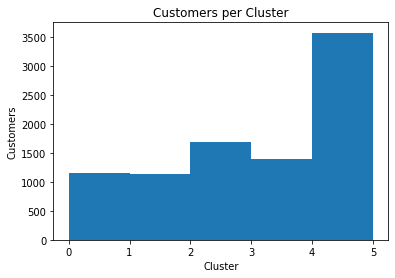

In [39]:
clustering = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=5)

cluster_labels = clustering.fit_predict(df_norm)

plt.hist(cluster_labels, bins=range(6))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

In [40]:
df_h = df.copy()
df_h['hierarchical_cluster'] = cluster_labels

In [41]:
df_h = df_h.reindex(columns=['CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'TOTAL_PURCHASES', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'hierarchical_cluster'])

In [42]:
df_h

,CASH_ADVANCE,CASH_ADVANCE_TRX,TOTAL_PURCHASES,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,hierarchical_cluster
CUST_ID,,,,,,,
C10001,0.000000,0,190.80,2,1000.0,0.000000,4
C10002,6442.945483,4,0.00,0,7000.0,0.222222,2
C10003,0.000000,0,1546.34,12,7500.0,0.000000,0
C10004,205.788017,1,2998.00,1,7500.0,0.000000,0
C10005,0.000000,0,32.00,1,1200.0,0.000000,4
...,...,...,...,...,...,...,...
C19186,0.000000,0,582.24,6,1000.0,0.500000,3
C19187,0.000000,0,600.00,6,1000.0,0.000000,4
C19188,0.000000,0,288.80,5,1000.0,0.250000,4


In [43]:
df_c0 = df_h[df_h['hierarchical_cluster'] == 0]
df_c1 = df_h[df_h['hierarchical_cluster'] == 1]
df_c2 = df_h[df_h['hierarchical_cluster'] == 2]
df_c3 = df_h[df_h['hierarchical_cluster'] == 3]
df_c4 = df_h[df_h['hierarchical_cluster'] == 4]

In [44]:
for col in df_h.columns:
    print("---------------------------------------------------------------------------------------------")
    for dframe in [df_c0, df_c1, df_c2, df_c3, df_c4]:
        if col != "hierarchical_cluster":
            print(f"Cluster {dframe.hierarchical_cluster[0]} Mean of {col}: {dframe[col].mean():.2f} (Deviation from Overall Mean: {(((dframe[col].mean() - df[col].mean()) / df[col].mean()) * 100):.2f}%)")

---------------------------------------------------------------------------------------------
Cluster 0 Mean of CASH_ADVANCE: 567.20 (Deviation from Overall Mean: -41.92%)
Cluster 1 Mean of CASH_ADVANCE: 706.42 (Deviation from Overall Mean: -27.66%)
Cluster 2 Mean of CASH_ADVANCE: 3745.49 (Deviation from Overall Mean: 283.56%)
Cluster 3 Mean of CASH_ADVANCE: 37.59 (Deviation from Overall Mean: -96.15%)
Cluster 4 Mean of CASH_ADVANCE: 249.84 (Deviation from Overall Mean: -74.41%)
---------------------------------------------------------------------------------------------
Cluster 0 Mean of CASH_ADVANCE_TRX: 1.40 (Deviation from Overall Mean: -56.60%)
Cluster 1 Mean of CASH_ADVANCE_TRX: 2.44 (Deviation from Overall Mean: -24.43%)
Cluster 2 Mean of CASH_ADVANCE_TRX: 12.03 (Deviation from Overall Mean: 271.78%)
Cluster 3 Mean of CASH_ADVANCE_TRX: 0.14 (Deviation from Overall Mean: -95.56%)
Cluster 4 Mean of CASH_ADVANCE_TRX: 1.12 (Deviation from Overall Mean: -65.33%)
---------------------

In [46]:
print("---------------------------------------------------------------------------------------------")
for dframe in [df_c0, df_c1, df_c2, df_c3, df_c4]:
    print(f"Cluster {dframe.hierarchical_cluster[0]} Count: {dframe.index.value_counts().sum()}")
    for col in df_h.columns:
        if col != "hierarchical_cluster":
            print(f"Cluster {dframe.hierarchical_cluster[0]} Mean of {col}: {dframe[col].mean():.2f} (Deviation from Overall Mean: {(((dframe[col].mean() - df[col].mean()) / df[col].mean()) * 100):.2f}%)")
    print("---------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------
Cluster 0 Count: 1158
Cluster 0 Mean of CASH_ADVANCE: 567.20 (Deviation from Overall Mean: -41.92%)
Cluster 0 Mean of CASH_ADVANCE_TRX: 1.40 (Deviation from Overall Mean: -56.60%)
Cluster 0 Mean of TOTAL_PURCHASES: 1562.29 (Deviation from Overall Mean: -22.21%)
Cluster 0 Mean of PURCHASES_TRX: 8.86 (Deviation from Overall Mean: -39.79%)
Cluster 0 Mean of CREDIT_LIMIT: 8417.66 (Deviation from Overall Mean: 87.38%)
Cluster 0 Mean of PRC_FULL_PAYMENT: 0.02 (Deviation from Overall Mean: -89.02%)
---------------------------------------------------------------------------------------------
Cluster 1 Count: 1133
Cluster 1 Mean of CASH_ADVANCE: 706.42 (Deviation from Overall Mean: -27.66%)
Cluster 1 Mean of CASH_ADVANCE_TRX: 2.44 (Deviation from Overall Mean: -24.43%)
Cluster 1 Mean of TOTAL_PURCHASES: 8635.48 (Deviation from Overall Mean: 329.95%)
Cluster 1 Mean of PURCHASES_TRX: 59.66 (Deviation fro

In [47]:
import scipy.cluster.hierarchy as shc

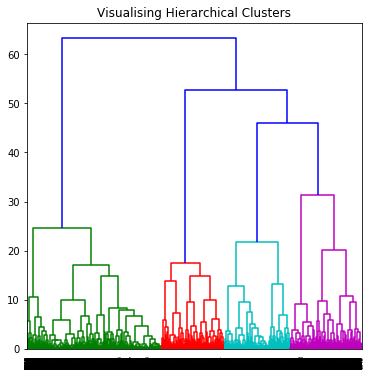

In [48]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising Hierarchical Clusters') 
Dendrogram = shc.dendrogram((shc.linkage(df_norm, method ='ward'))) 

In [49]:
from sklearn.decomposition import PCA 

In [50]:
pca = PCA(n_components=2).fit(df_norm)
array_pca = pca.fit_transform(df_norm)
df_pca = pd.DataFrame(array_pca) 
df_pca.columns = ['PCA1', 'PCA2']
df_pca.head()

,PCA1,PCA2
0,-0.738798,-0.107801
1,0.570946,0.641783
2,0.348583,-0.010662
3,0.346259,0.145023
4,-0.735061,-0.086664


In [51]:
print(pca.explained_variance_)

[0.32646636 0.24119693]


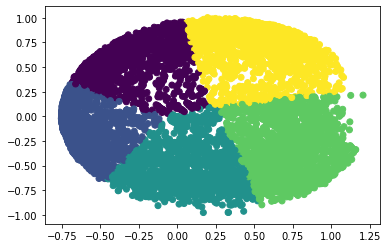

In [52]:
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c = KMeans(n_clusters=5, random_state=42).fit_predict(array_pca), cmap =None) 
plt.show()

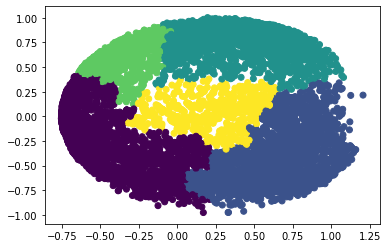

In [53]:
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=5).fit_predict(array_pca), cmap =None) 
plt.show()

In [54]:
pca = PCA(n_components=3).fit(df_norm)
array_pca = pca.fit_transform(df_norm)
df_pca = pd.DataFrame(array_pca) 
df_pca.columns = ['PCA1', 'PCA2', 'PCA3']
df_pca.head()

,PCA1,PCA2,PCA3
0,-0.738798,-0.107801,-0.024810
1,0.570946,0.641783,0.375268
2,0.348583,-0.010662,-0.822390
3,0.346259,0.145023,-0.699699
4,-0.735061,-0.086664,-0.036684


In [55]:
print(pca.explained_variance_)

[0.32646636 0.24119693 0.16944086]
